# visualization

这个笔记本会带领大家学习最基本的数据可视化技巧，我们会使用`matplotlib`和`seaborns`作为工具，其中`matplotlib`是基石，`seaborns`是基于`matplotlib`拓展的高级库，可以更为简便的实现绘图，让我们开始吧，在开始之前，你需要会使用`pandas`读取数据，我们将使用Data Science界的传统文化：**titanic**数据集, 其中每一列的含义可以在kaggle官网上找到(https://www.kaggle.com/competitions/titanic/data)

In [ ]:
# 引入包
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# 读取数据
titanic = pd.read_csv("train.csv")
titanic

## Bar Plot
条形图📊，是一类常用于表达每一类别分别的量的图标，比如说：我们可以尝试可视化一下，*Fare*和*Survive*的关系：

In [ ]:
# For Seaborn
sns.catplot(x="Survived", y="Fare", data=titanic, kind="bar")

x, y指定的是在data中的列名，data指定的是数据的来源，kind指定的是图表的形式

In [ ]:
# For matplotlib
plt.figure()    #创建空白绘图窗口
plt.bar(titanic['Survived'], titanic['Fare'], width=0.2)   #在空白绘图窗口上进行绘制

#为x轴，y轴创建标签
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

## Scatter Plot
Scatter Plot，散点图，简单的将每个点分布于整个空间，常用于快速发现数据中的隐藏规律，比如我们现在想寻找年龄Age与Fare之间的关系

In [ ]:
# For Seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic)

In [ ]:
# For matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

此时我们使用到了`figsize`参数，这个参数主要是通过给予(x, y)值以调控图片的大小，plt.scatter()中的`alpha`参数调控的是每一个点的透明度，0-1之间，越接近1越不透明

## Histogram
Histogram，直方图，常用于衡量连续型数据自身的分布，比如我们想衡量年龄的分布：

In [ ]:
# For Seaborn
sns.distplot(titanic['Age'])

In [ ]:
# For matplotlib
plt.figure()
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

这里我们使用了一个`bins`参数，这个参数用来调节分组的大小，比如这里我们将整个数据均分为20组。

## Box Plot

In [ ]:
sns.catplot(x="Sex", y="Age", data=titanic, kind="box", height=4)

In [ ]:
plt.figure()
plt.boxplot((titanic.query("Sex=='male'")['Age'], titanic.query("Sex=='female'")['Age']), labels=['Male', 'Female'])
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

从这个例子中我们可以发现，无论是哪种图片，`seaborn`的语法和形式都比`matplotlib`要简单很多，这也是为什么`seaborn`被称为高级库，但是`matplotlib`提供了更多可以个性化定制的参数，比如边界，比如颜色，比如大小，比如形状等等，当然这些对于初级教程有些太难了，请参考：https://matplotlib.org/ 

## 多图绘制

有的时候，我们希望一次性显示多个图进行对比，matplotlib也提供了相应的的API

In [ ]:
#subplot()可以返回一个带有指定数量子图的Figure，在这个例子中就返回了一个2×2的Figure
#我们可以是使用axs去选定我们想要使用的子图
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

#countplot()可以很好的展现离散型变量之间的关系
sns.countplot(x = "Sex", hue = "Survived", data = titanic, ax = axs[0][0])      #使用第零行第零列的子图进行绘制，探究不同性别的存活比例
axs[0][0].set_title("Gender and Survived rate")                                 #通过axs[0][0]来选中子图并对标题进行设置
axs[0][0].set_xlabel("Gender", size = 20)                                       #对x轴标签进行设置
axs[0][0].set_ylabel("Survived count", size = 20)

#你可以仿照上面的例子来对其他的子图进行操作
sns.countplot(x = "Pclass", hue = "Survived", data = titanic, ax = axs[0][1])
sns.countplot(x = "Embarked", hue = "Survived", data = titanic, ax = axs[1][0])



更多时候我们也可以直接通过plt.subplot()指令对当前进行绘制的子图进行切换

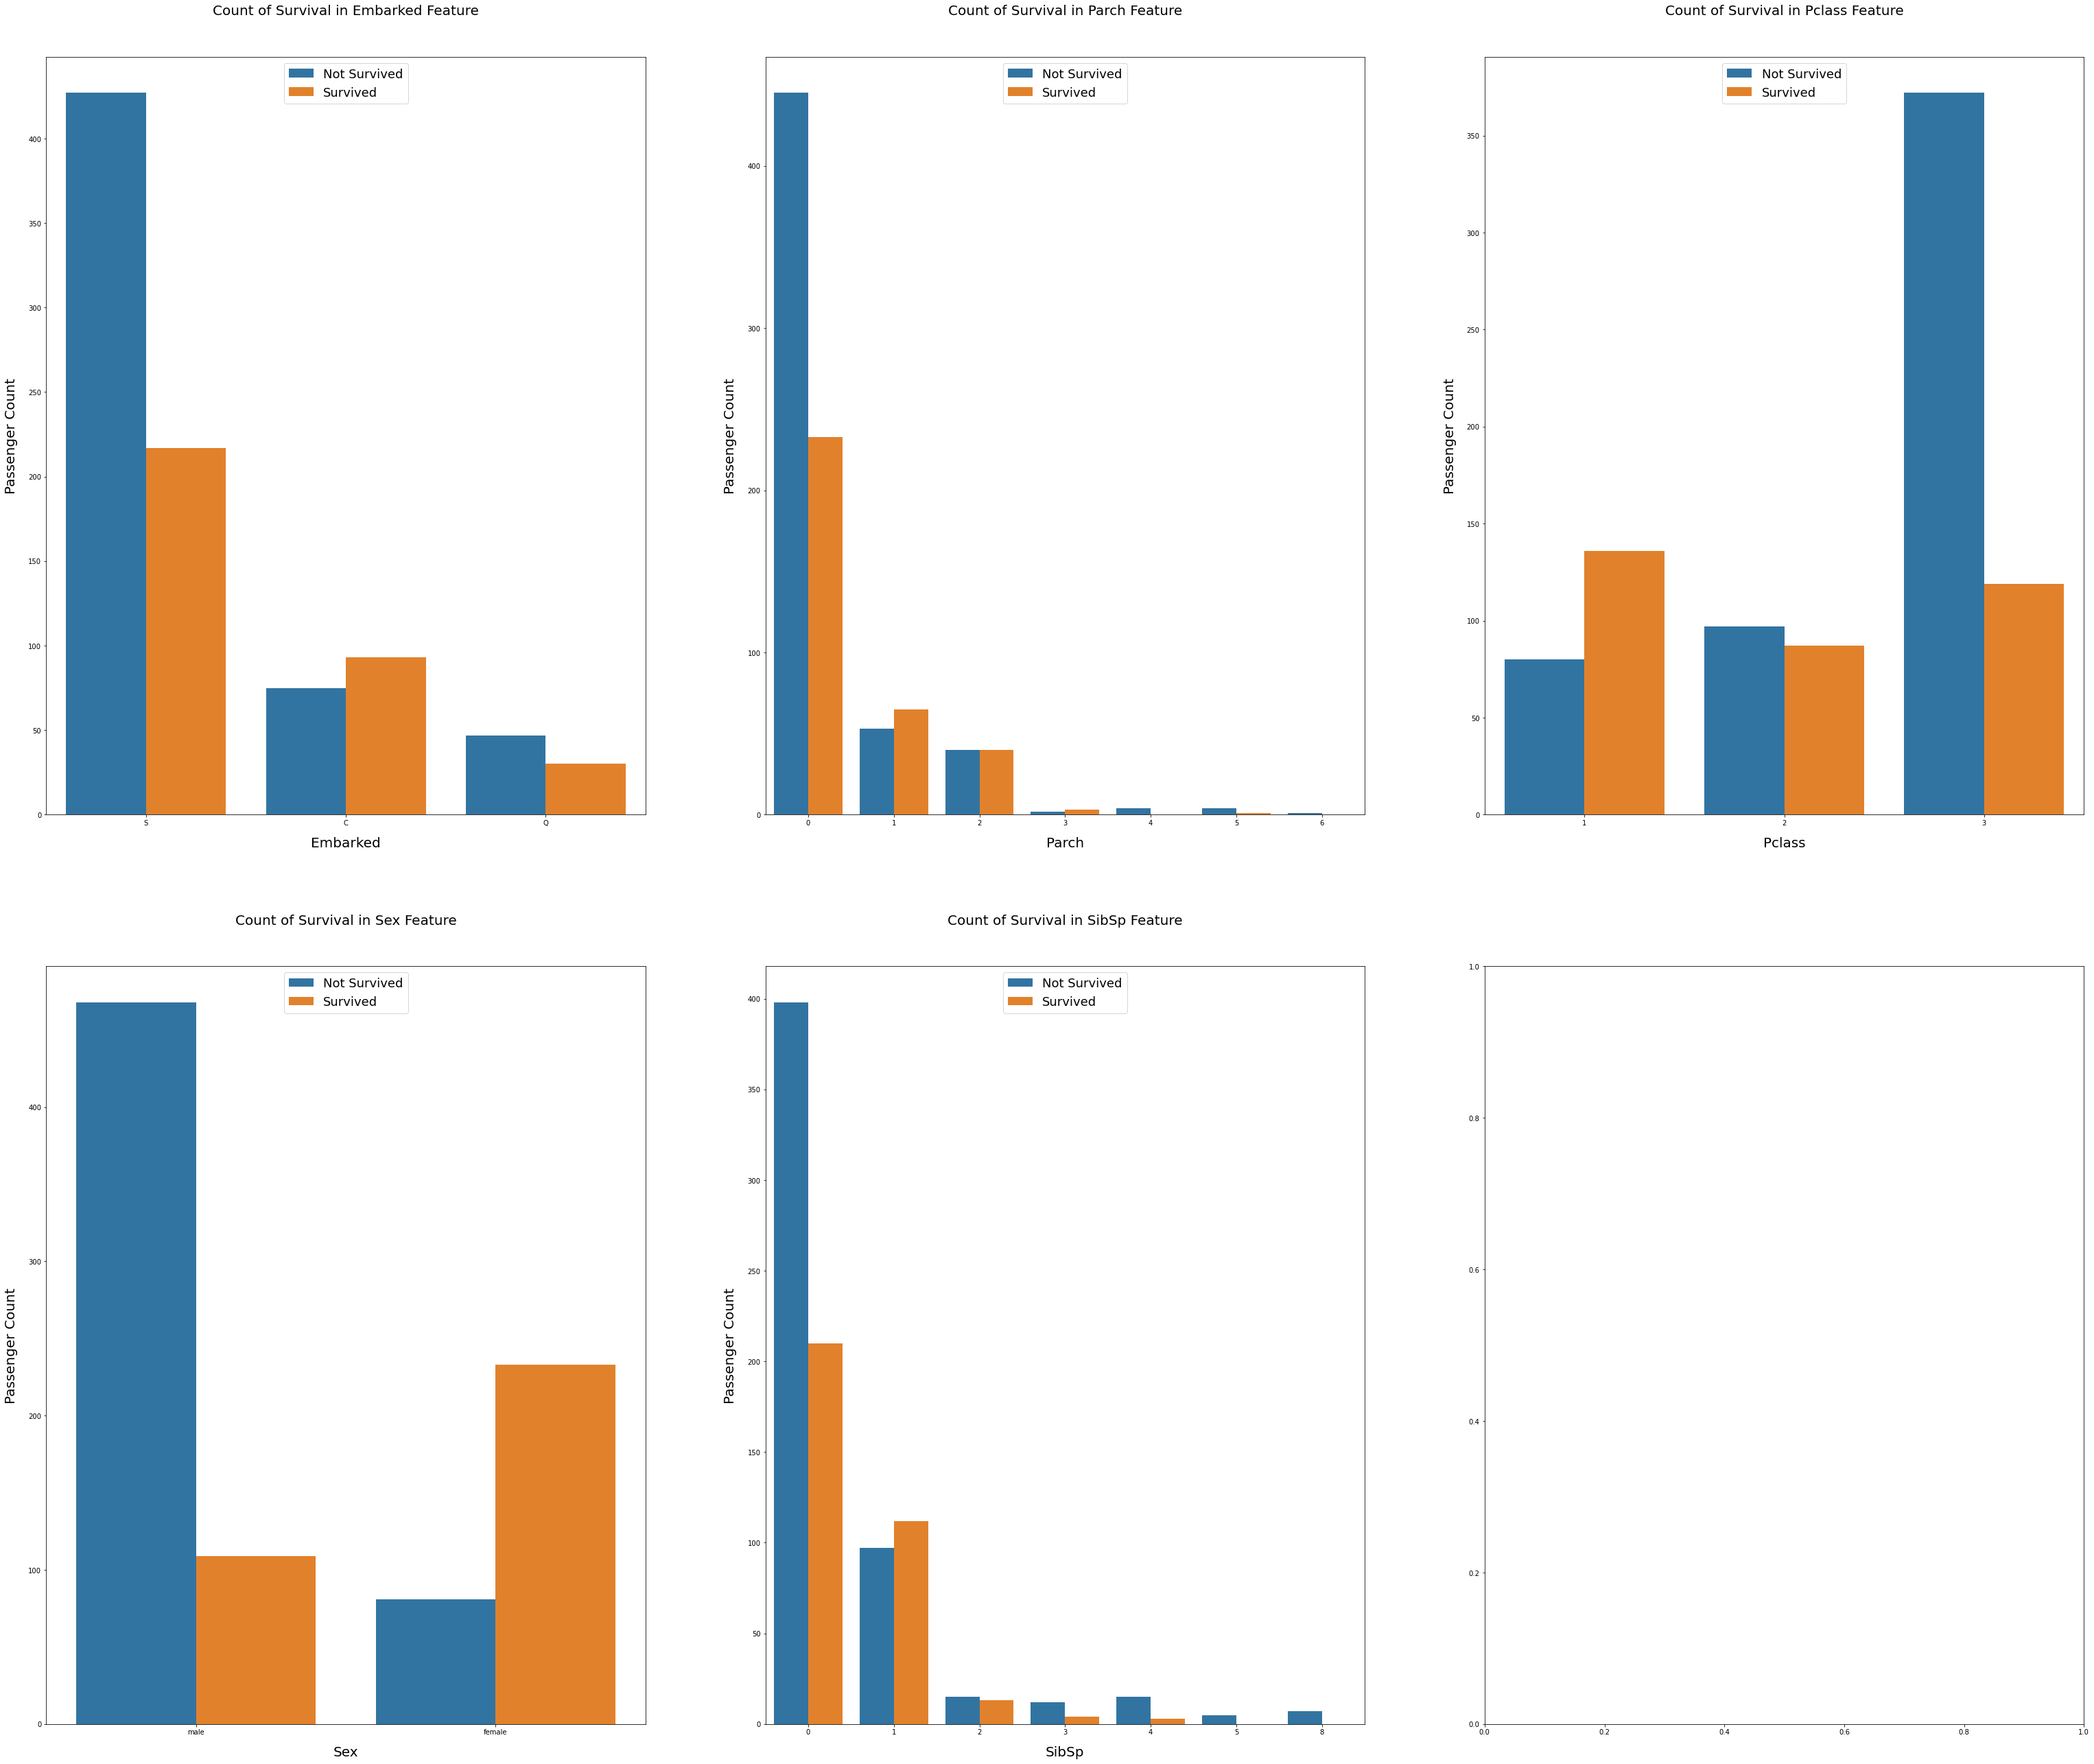

In [45]:
#将所有categorical类型的列放在一个list中
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 30))   #创建一个2×3的figure
plt.subplots_adjust(right=1.5, top=1.25)                      #对子图的位置进行细微的调整

for i, feature in enumerate(cat_features, 1):                 #enumerate返回(0, seq[0]), (1, seq[1]), (2, seq[2]), ...形式的元组  
    plt.subplot(2, 3, i)                                      #指定当前进行绘制的子图

    sns.countplot(x=feature, hue='Survived', data=titanic) 
    

    #绘图的细节进行调整
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

有没有发现`matplotlib`有一个几乎标准的语法形式：
* `plt.plot()`或者`plt.subplot()`创建展示窗
* `plt.boxplot` or `plt.scatter` or `plt.plot`:创建一个图
* `plt.xlabel()`, `plt.ylabel()`, `plt.title()`：做一些修饰
* `plt.show()`：把图显示出来